In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error

Importar datos

In [5]:
r="winequality-red.csv"
datos=pd.read_csv(r,sep=";")
datos.describe() # Descripción de los datos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Crear los datos de entrenamiento y prueba

In [51]:
X=datos.drop(["alcohol","quality"],axis=1).values
y=datos["alcohol"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=123)


Normalizar los datos

In [60]:
# Se toma la media de los valores de entrenamiento
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)

array([ -2.91487796e-16,   3.92252037e-15,   4.34887987e-17,
        -5.16472887e-16,   8.76034542e-15,   2.86453165e-17,
         2.33502732e-17,  -1.22834242e-13,  -3.80316055e-14,
         7.30880910e-15])

Definición de variables predictoras y a predecir

In [123]:
X=datos.drop(["alcohol","quality"],axis=1).values
Y=datos["alcohol"].values

# Normalizar los datos

nrows= len(X)
ncols=len(X[0])

# Medias y varianzas
xMeans=[]
xSD=[]
for i in range(ncols):
    col=[X[j][i] for j in range(nrows)]
    mean=sum(col)/nrows
    xMeans.append(mean)
    colDiff= [(X[j][i]-mean) for j in range(nrows)]
    sumSq=sum([colDiff[i]**2 for i in range(nrows)])
    stdDev= sqrt(sumSq/nrows)
    xSD.append(stdDev)

# Uso de la media y desviación para normalizar
XNormalized=[]
for i in range(nrows):
    rowNormalized=[(X[i][j]-xMeans[j])/xSD[j] for j in range(ncols)]
    XNormalized.append(rowNormalized)

# Normalización de las etiquetas
meanLabel=sum(Y)/nrows
sdLabel=sqrt(sum([(Y[i]-meanLabel)**2 for i in range(nrows)])/nrows)

YNormalized=[(Y[i]-meanLabel)/sdLabel for i in range(nrows)]


X= np.array(XNormalized)
Y= np.array(YNormalized)
X= np.insert(X,0,1,axis=1) # Asignación de una columna de 1 para el b0
n=len(X[0]) # Número de variables

# Genearación de betas iniciales
B=np.zeros(n)
alpha=0.001                             # Tasa de aprendizaje

Definición de la función costo y gradiente

In [37]:
# Función costo
def costo(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/(2*m)
    return J

# Gradiente
def grad(X,Y,B,alpha,iterations):
    cost_hist=[0]*iterations
    m=len(Y)
    for i in range(iterations):
        h=X.dot(B)
        loss= h-Y
        gradient= X.T.dot(loss)/m
        B=B-alpha*gradient
        cost=costo(X,Y,B)
        cost_hist[i]=cost
    return B, cost_hist, loss

In [96]:
newB, cost_hist, loss= grad(X,Y,B,alpha,10000)
for i in range(len(newB)):
    print("Beta %s :"%(i), newB[i])
print("Costo en la última iteración:","%.4f"%cost_hist[-1])

Beta 0 : 3.69805688261e-13
Beta 1 : 0.560100518059
Beta 2 : 0.0756504470011
Beta 3 : 0.256621351402
Beta 4 : 0.327627259255
Beta 5 : -0.130992303959
Beta 6 : 0.0156362625941
Beta 7 : -0.150197523988
Beta 8 : -0.914082081894
Beta 9 : 0.401492592499
Beta 10 : 0.196741532548
Costo en la última iteración: 0.1743


El menor costo es: 0.174330376794


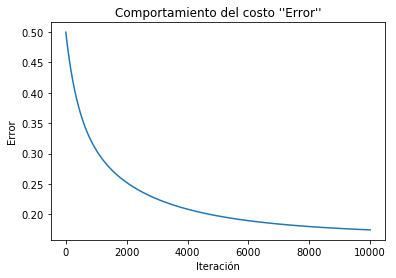

In [97]:
minMse=min(cost_hist)
print("El menor costo es: %s" %(minMse))

xaxis=range(len(cost_hist))
plt.plot(xaxis,cost_hist)

plt.title("Comportamiento del costo ''Error''")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.show()

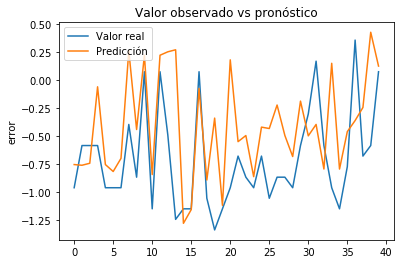

In [112]:
pronostico = []
for a in X:
    val = np.sum(a*newB)
    pronostico.append(val)

plt.plot(Y[:40], label='Valor real')
plt.plot(pronostico[:40], label='Predicción')
plt.title("Valor observado vs pronóstico")
plt.ylabel('error')
plt.legend(loc=2)
plt.show()

In [122]:
y1=Y.tolist()
Coef=r2_score(y1,pronostico)*100
print(" El coeficiente de determinación (R^2) es: %.2f "%Coef + "%")

 El coeficiente de determinación (R^2) es: 65.13 %
